In [5]:
# All imports go in this block
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

In [8]:
# Loading data from files goes in this block
df_311_weather_income = pd.read_csv('data/311_weather_income.csv')

In [61]:
# Data manipulation: get counts of reports by neighborhood
value_counts = df_311_weather_income["region"].value_counts()
value_counts

Dorchester              18875
Roxbury                 11380
Allston/Brighton         8920
Jamaica Plain            8676
Back Bay/Beacon Hill     7514
West Roxbury             6865
Hyde Park                6698
East Boston              6650
South End                5293
Roslindale               5199
Charlestown              4104
Boston                   2480
Fenway/Kenmore           2438
South Boston              711
Mattapan                  172
Name: region, dtype: int64

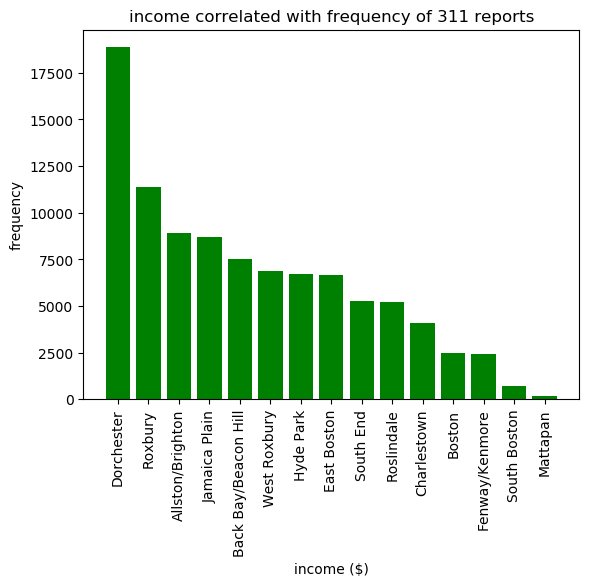

In [63]:
y_pos = np.arange(len(value_counts.keys()))
plt.bar(y_pos, list(value_counts[key] for key in value_counts.keys()), align='center',
        color='green', ecolor='black')
plt.xticks(y_pos, value_counts.keys(), rotation='vertical')
plt.xlabel("income ($)")
plt.ylabel("frequency")
plt.title("income correlated with frequency of 311 reports")
plt.show()

In [47]:
# Data manipulation: get counts of reports by region
value_counts = df_311_weather_income["income"].value_counts()
value_counts

45807    18875
30654    11380
52362     8920
55861     8676
82742     7514
71066     6865
53474     6698
43511     6650
51870     5293
62702     5199
83926     4104
52433     2480
32509     2438
63747      711
42164      172
Name: income, dtype: int64

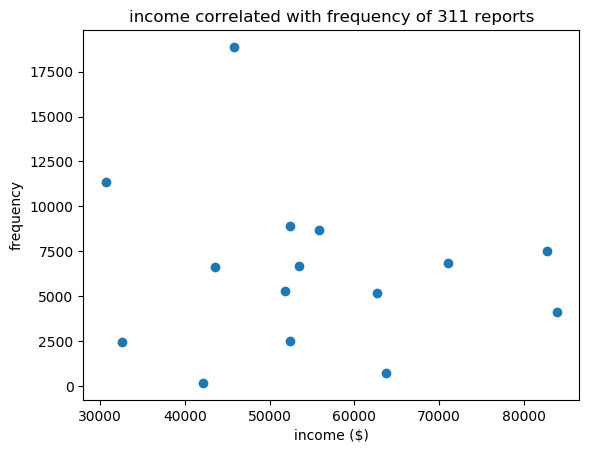

In [60]:
# Plot how many of our reports come from low vs high income areas
plt.scatter(list(map(lambda x: int(x), value_counts.keys())), list(value_counts[key] for key in value_counts.keys()))
plt.xlabel("income ($)")
plt.ylabel("frequency")
plt.title("income correlated with number of 311 reports")
plt.show()